# <font color=blue>Multiple Linear Regression with Regularization using Ridge and Lasso
## Surprise Housing Case Study

#### Problem Statement:

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.


The company wants to know:

- Which variables are significant in predicting the price of a house, and

- How well those variables describe the price of a house.


## <font color=green>Bookmarks to Notebook Sections
<font color=blue>***1. Go to <a href=#no1>Improrting necessary libraries</a><br>
2. Go to <a href=#no2>Reading and Understanding the data</a><br>
3. Go to <a href=#no3>Identifying and treating Missing Values </a><br>
4. Go to <a href=#no4>Creating Derived Metrics</a><br>
5. Go to <a href=#no5>Dropping Columns that do not carry a lot of information</a><br>
6. Go to <a href=#no6>Creating Sub Categories for OverallCond and OverallQual Columns </a><br>
7. Go to <a href=#no7>Mapping MSSubClass and CentralAir Columns to their categorical and binary values respectively </a><br>
8. Go to <a href=#no8>Visualising the Data</a><br>
9. Go to <a href=#no9>Dummy Variables Creation</a><br>
10. Go to <a href=#no10>Splitting the Data into Training and Testing Sets</a><br>
11. Go to <a href=#no11>Using RFE to get Top 30 Features</a><br>
12. Go to <a href=#no12>Building Model 0 using OLS</a><br>
13. Go to <a href=#no13>Using VIF to remove Multicollinearity</a><br>
14. Go to <a href=#no14>Making Predictions on the Test Set and Evaluating the Model</a><br>
15. Go to <a href=#no15>Lasso Regression</a><br>
16. Go to <a href=#no16>Ridge Regression</a><br>
17. Go to <a href=#no17>Comparing accuracy metrics of Linear, Ridge and Lasso Regression</a><br>
18. Go to <a href=#no18>Comparing Coefficients of Ridge and Lasso Regression</a><br>***

## <font color=red>1. Importing necessary libraries <a name='no1' />

In [719]:
# Import Libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

## <font color=red> 2. Reading and understanding the data <a name='no2' />

In [720]:
housing = pd.read_csv("train.csv")
# Check the head of the dataset
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [721]:
#Checking Shape
housing.shape

(1460, 81)

In [722]:
#Checking Info on the dataframe
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [723]:
#Checking for mean, mode, Min-Max and Median
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### <font color=green>2.1 Observation

-  <font color=blue>The shape of the dataframe is `1460x81`.
-  There are null values in multiple columns as observed from the info().
-  There are both categorical and numerical variables in the dataset.

## <font color=red> 3. Identifying and treating Missing Values <a name='no3' />

In [724]:
#Checking Null Values Percentage across Columns
print(round(100*(housing.isnull().sum()/len(housing.index)),2).sort_values(ascending=False))

PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
FireplaceQu      47.26
LotFrontage      17.74
GarageCond        5.55
GarageType        5.55
GarageYrBlt       5.55
GarageFinish      5.55
GarageQual        5.55
BsmtExposure      2.60
BsmtFinType2      2.60
BsmtFinType1      2.53
BsmtCond          2.53
BsmtQual          2.53
MasVnrArea        0.55
MasVnrType        0.55
Electrical        0.07
Utilities         0.00
YearRemodAdd      0.00
MSSubClass        0.00
Foundation        0.00
ExterCond         0.00
ExterQual         0.00
Exterior2nd       0.00
Exterior1st       0.00
RoofMatl          0.00
RoofStyle         0.00
YearBuilt         0.00
LotConfig         0.00
OverallCond       0.00
OverallQual       0.00
HouseStyle        0.00
BldgType          0.00
Condition2        0.00
BsmtFinSF1        0.00
MSZoning          0.00
LotArea           0.00
Street            0.00
Condition1        0.00
Neighborhood      0.00
LotShape          0.00
LandContour

### <font color=green>3.1 Observation

-  <font color=blue>`PoolQC`(99.52%), `MiscFeature`(96.30%), `Alley`(93.77%), `Fence`(80.75%) and `FireplaceQu`(47.26%) have very high number of null values.
-  `LotFrontage` has 17.74% null values and can be treated seperately. 
-  `GarageCond`,`GarageType`,`GarageYrBlt`,`GarageFinish`,`BsmtExposure`,`BsmtFinType2`,`BsmtFinType1`,`BsmtCond`,`BsmtQual`, `MasVnrArea`,`MasVnrType`,`Electrical` all have less than 6% null values and can be treated seperately.
-  On looking closely at the Data Dictionary it is observed that most of the NA in these columns have been tagged to a seperate category. So we need to treat these by replacing them with those categories.   

### <font color=green>3.2 Mapping NA to categories from Data Dictionary

In [725]:
#Filling NA with their meanings from Data Dictionary
housing['Alley']=housing['Alley'].fillna("NoAlley")
housing['BsmtQual']=housing['BsmtQual'].fillna("NoBsmt")
housing['BsmtCond']=housing['BsmtCond'].fillna("NoBsmt")
housing['BsmtExposure']=housing['BsmtExposure'].fillna("NoBsmt")
housing['BsmtFinType1']=housing['BsmtFinType1'].fillna("NoBsmt")
housing['BsmtFinType2']=housing['BsmtFinType2'].fillna("NoBsmt")
housing['FireplaceQu']=housing['FireplaceQu'].fillna("NoFireplace")
housing['GarageType']=housing['GarageType'].fillna("NoGarage")
housing['GarageFinish']=housing['GarageFinish'].fillna("NoGarage")
housing['GarageQual']=housing['GarageQual'].fillna("NoGarage")
housing['GarageCond']=housing['GarageCond'].fillna("NoGarage")
housing['PoolQC']=housing['PoolQC'].fillna("NoPool")
housing['Fence']=housing['Fence'].fillna("NoFence")
housing['MiscFeature']=housing['MiscFeature'].fillna("NoMisc")

In [726]:
#Checking Null Values Percentage across Columns
print(round(100*(housing.isnull().sum()/len(housing.index)),2).sort_values(ascending=False))

LotFrontage      17.74
GarageYrBlt       5.55
MasVnrType        0.55
MasVnrArea        0.55
Electrical        0.07
SalePrice         0.00
ExterCond         0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
ExterQual         0.00
BsmtQual          0.00
Foundation        0.00
BsmtCond          0.00
BsmtExposure      0.00
BsmtFinType1      0.00
BsmtFinSF1        0.00
BsmtFinType2      0.00
BsmtFinSF2        0.00
YearRemodAdd      0.00
YearBuilt         0.00
TotalBsmtSF       0.00
Utilities         0.00
MSSubClass        0.00
MSZoning          0.00
LotArea           0.00
Street            0.00
Alley             0.00
LotShape          0.00
LandContour       0.00
LotConfig         0.00
OverallCond       0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
BsmtUnfSF         0.00
HeatingQC         0.00
Heating           0.00
ScreenPorch

### <font color=green>3.3 Treating Other Null Values

### <font color=green>3.3.1 Treating 'LotFrontage'

In [727]:
housing['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

Text(0.5, 0, 'LotFrontage')

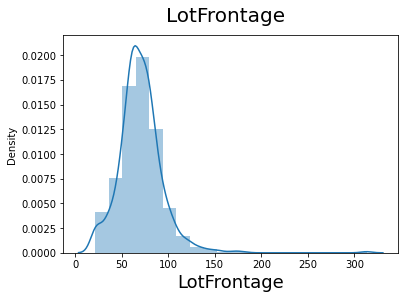

In [728]:
# Plot the histogram of 'LotFrontage'
fig = plt.figure()
sns.distplot((housing['LotFrontage']), bins = 20)
fig.suptitle('LotFrontage', fontsize = 20)                  # Plot heading 
plt.xlabel('LotFrontage', fontsize = 18)   

In [729]:
#Filling Null Values with 69(Median)
housing['LotFrontage']=housing['LotFrontage'].fillna(69)

#### <font color=green>3.3.1.1 Observation

-  <font color=blue> The null values in the column `LotFrontage` (17.74%) were filled with their **median (69)** as the maximum value was 313 and the mean and median were not hugely different.

### <font color=green>3.3.2 Treating 'MasVnrArea'

In [730]:
housing['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

Text(0.5, 0, 'MasVnrArea')

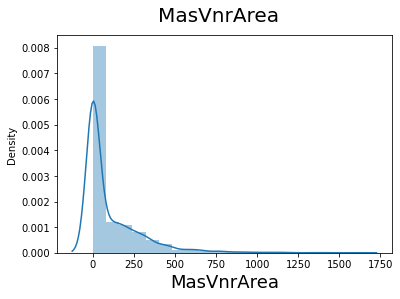

In [731]:
# Plot the histogram of 'MasVnrArea'
fig = plt.figure()
sns.distplot((housing['MasVnrArea']), bins = 20)
fig.suptitle('MasVnrArea', fontsize = 20)                  # Plot heading 
plt.xlabel('MasVnrArea', fontsize = 18)   

In [732]:
#Filling Null Values with 0 (Median)
housing['MasVnrArea']=housing['MasVnrArea'].fillna(0)

#### <font color=green>3.3.2.1 Observation

-  <font color=blue> The null values in the column `LotFrontage` (0.55%) were filled with their **median (0)** as the maximum value was 1600 and the mean was high due to outliers.

### <font color=green>3.3.3 Treating Null Values of Categorical Columns

In [733]:
housing[['GarageYrBlt','MasVnrType','Electrical']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GarageYrBlt  1379 non-null   float64
 1   MasVnrType   1452 non-null   object 
 2   Electrical   1459 non-null   object 
dtypes: float64(1), object(2)
memory usage: 34.3+ KB


In [734]:
#Dropping Columns
housing=housing.drop(columns=['GarageYrBlt'])

In [735]:
#Checking for Mode
housing[['MasVnrType','Electrical']].mode()

,MasVnrType,Electrical
0,None,SBrkr


In [736]:
#Filling the columns null values with their Mode
cols = ['MasVnrType','Electrical']
housing[cols]=housing[cols].fillna(housing.mode().iloc[0])

In [737]:
housing[cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   MasVnrType  1460 non-null   object
 1   Electrical  1460 non-null   object
dtypes: object(2)
memory usage: 22.9+ KB


#### <font color=green>3.3.3.1 Observation

-  <font color=blue>The `GarageYrBlt` column was removed as the column makes sense only if there is a Garage and the null values cannot be filled.
-  The null values in the categorical columns `MasVnrType`, `Electrical` were filled with their **modes**.

In [738]:
#Checking Null Values Percentage across Columns
print(round(100*(housing.isnull().sum()/len(housing.index)),2).sort_values(ascending=False))

SalePrice        0.0
SaleCondition    0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
YearRemodAdd     0.0
YearBuilt        0.0
OverallCond      0.0
LandContour      0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
Alley            0.0
LotShape         0.0
Utilities        0.0
OverallQual      0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
TotalBsmtSF      0.0
Heating          0.0
HeatingQC        0.0
ScreenPorch      0.0
GarageQual       0.0
GarageCond       0.0
PavedDrive       0.0
WoodDeckSF       0.0
OpenPorchSF  

### <font color=green>3.4 Observation

-  <font color=blue> All null values have been treated and verified.

## <font color=red>4. Creating Derived Metrics  <a name='no4' />

### <font color=green> 4.1 Age of house when sold

In [739]:
#Calculating age of house from Year Sold and Year Built
housing['Age']=housing['YrSold']-housing['YearBuilt']

### <font color=green>4.2 Observation

-  <font color=blue>The **age of the building** when it was sold was found out by subtracting the Year in which it was built.

## <font color=red>5. Dropping Columns that do not carry a lot of information  <a name='no5' />

In [740]:
housing['Street'].value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [741]:
housing['Utilities'].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [742]:
housing['PoolQC'].value_counts()

NoPool    1453
Gd           3
Fa           2
Ex           2
Name: PoolQC, dtype: int64

In [743]:
housing['MiscFeature'].value_counts()

NoMisc    1406
Shed        49
Gar2         2
Othr         2
TenC         1
Name: MiscFeature, dtype: int64

In [744]:
housing['Alley'].value_counts()

NoAlley    1369
Grvl         50
Pave         41
Name: Alley, dtype: int64

In [745]:
housing['Fence'].value_counts()

NoFence    1179
MnPrv       157
GdPrv        59
GdWo         54
MnWw         11
Name: Fence, dtype: int64

In [746]:
#Dropping Columns
housing=housing.drop(columns=['Id','Street','Utilities','PoolQC','MiscFeature','Alley','Fence'])

### <font color=green>5.2 Observation

-  <font color=blue> The columns `Street`, `Utilities`, `PoolQC`, `MiscFeature`, `Alley`, `Fence` have very high percentage of one value and do not carry a lot of essential information for the analysis and they can be dropped.
-  Similarly the `Id` columns is just a serial number(index) and can be dropped as well.

## <font color=red>6. Creating Sub Categories for `OverallCond` and `OverallQual` Columns  <a name='no6' />

In [747]:
#Mapping 1-10 into Low, Medium and High
housing['OverallCond']=np.where(housing['OverallCond']>=1,np.where(housing['OverallCond']<4,"Low",np.where(housing['OverallCond']<8,"Medium","High")),"High")
housing['OverallCond'].value_counts()

Medium    1335
High        94
Low         31
Name: OverallCond, dtype: int64

In [748]:
#Mapping 1-10 into Low, Medium and High
housing['OverallQual']=np.where(housing['OverallQual']>=1,np.where(housing['OverallQual']<4,"Low",np.where(housing['OverallQual']<8,"Medium","High")),"High")
housing['OverallQual'].value_counts()

Medium    1206
High       229
Low         25
Name: OverallQual, dtype: int64

### <font color=green>6.1 Observation

-  <font color=blue>The `OverallQual` and `OverallCond` had rankings from 1-10. If this were to be created into Dummy Variables, will occupy a lot of columns. So they have been categorized into **Low(1-3), Medium(4-7) and High(8-10)**.

## <font color=red>7. Mapping `MSSubClass` and `CentralAir` Columns to their categorical and binary values respectively  <a name='no7' />

### <font color=green> 7.1 Mapping `MSSubClass` to its Categorical Meaning

In [749]:
#Mapping the integer class to their Categorical meaning
housing['MSSubClass'] = housing['MSSubClass'].map({20:'1-STORY 1946 & NEWER ALL STYLES',30:'1-STORY 1945 & OLDER',40:'1-STORY W/FINISHED ATTIC ALL AGES',45:'1-1/2 STORY - UNFINISHED ALL AGES',50:'1-1/2 STORY FINISHED ALL AGES',60:'2-STORY 1946 & NEWER',70:'2-STORY 1945 & OLDER',75:'2-1/2 STORY ALL AGES',80:'SPLIT OR MULTI-LEVEL',85:'SPLIT FOYER',90:'DUPLEX - ALL STYLES AND AGES',120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',150:'1-1/2 STORY PUD - ALL AGES',160:'2-STORY PUD - 1946 & NEWER',180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'})

### <font color=green> 7.2 Mapping `CentralAir` to Binary Numeric Data

In [750]:
#Mapping Y and N to their Binary Values
housing['CentralAir'] = housing['CentralAir'].map({'Y':1,'N':0})

In [751]:
#Checking head of DataFrame
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Age
0,2-STORY 1946 & NEWER,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Medium,Medium,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,1,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NoFireplace,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500,5
1,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Medium,High,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,1,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500,31
2,2-STORY 1946 & NEWER,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Medium,Medium,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,1,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500,7
3,2-STORY 1945 & OLDER,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Medium,Medium,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,1,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000,91
4,2-STORY 1946 & NEWER,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,High,Medium,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,1,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000,8


## <font color=red>8. Visualising the Data  <a name='no8' />

### <font color=green>8.1 Visualising Some Categorical Variables

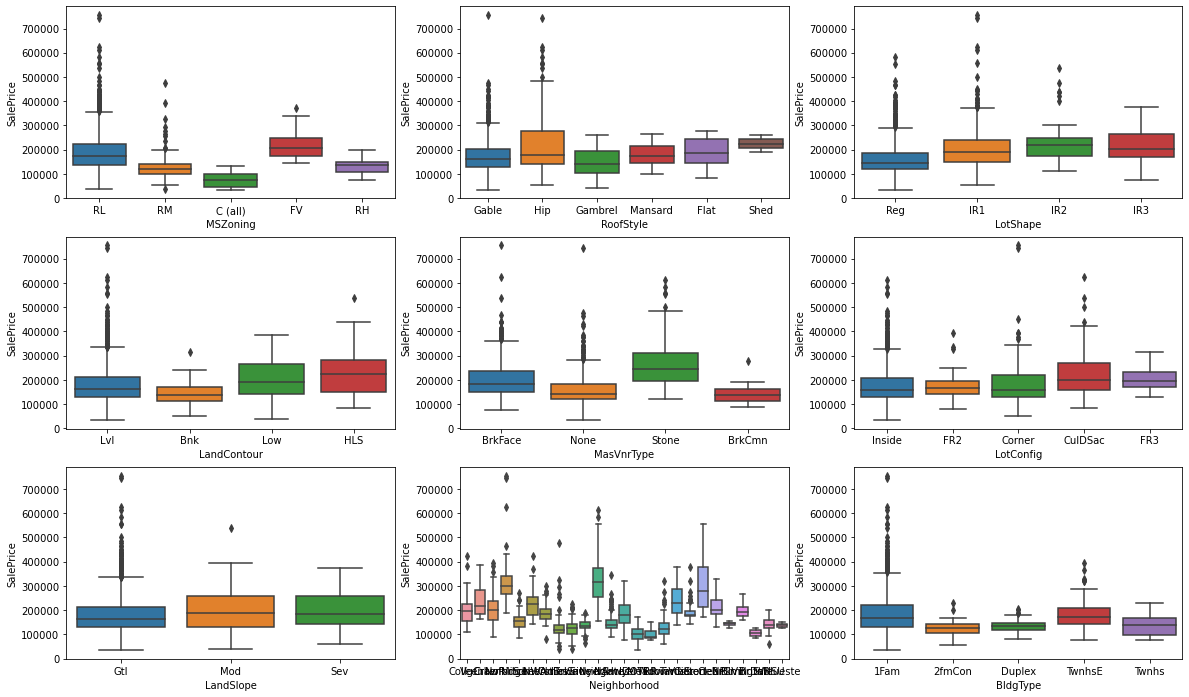

In [752]:
#Plotting BoxPlots for the Categorical Variables
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'MSZoning', y = 'SalePrice', data = housing)
plt.subplot(3,3,2)
sns.boxplot(x = 'RoofStyle', y = 'SalePrice', data = housing)
plt.subplot(3,3,3)
sns.boxplot(x = 'LotShape', y = 'SalePrice', data = housing)
plt.subplot(3,3,4)
sns.boxplot(x = 'LandContour', y = 'SalePrice', data = housing)
plt.subplot(3,3,5)
sns.boxplot(x = 'MasVnrType', y = 'SalePrice', data = housing)
plt.subplot(3,3,6)
sns.boxplot(x = 'LotConfig', y = 'SalePrice', data = housing)
plt.subplot(3,3,7)
sns.boxplot(x = 'LandSlope', y = 'SalePrice', data = housing)
plt.subplot(3,3,8)
sns.boxplot(x = 'Neighborhood', y = 'SalePrice', data = housing)
plt.subplot(3,3,9)
sns.boxplot(x = 'BldgType', y = 'SalePrice', data = housing)
plt.show()

### <font color=green>8.2 Visualising Numerical Variables

In [753]:
#Selecting All numeric (float and int) variables in the dataset
housing_numeric = housing.select_dtypes(include=['float64', 'int64'])
housing_numeric.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Age
0,65.0,8450,2003,2003,196.0,706,0,150,856,1,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,208500,5
1,80.0,9600,1976,1976,0.0,978,0,284,1262,1,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007,181500,31
2,68.0,11250,2001,2002,162.0,486,0,434,920,1,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,2008,223500,7
3,60.0,9550,1915,1970,0.0,216,0,540,756,1,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,2006,140000,91
4,84.0,14260,2000,2000,350.0,655,0,490,1145,1,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,2008,250000,8


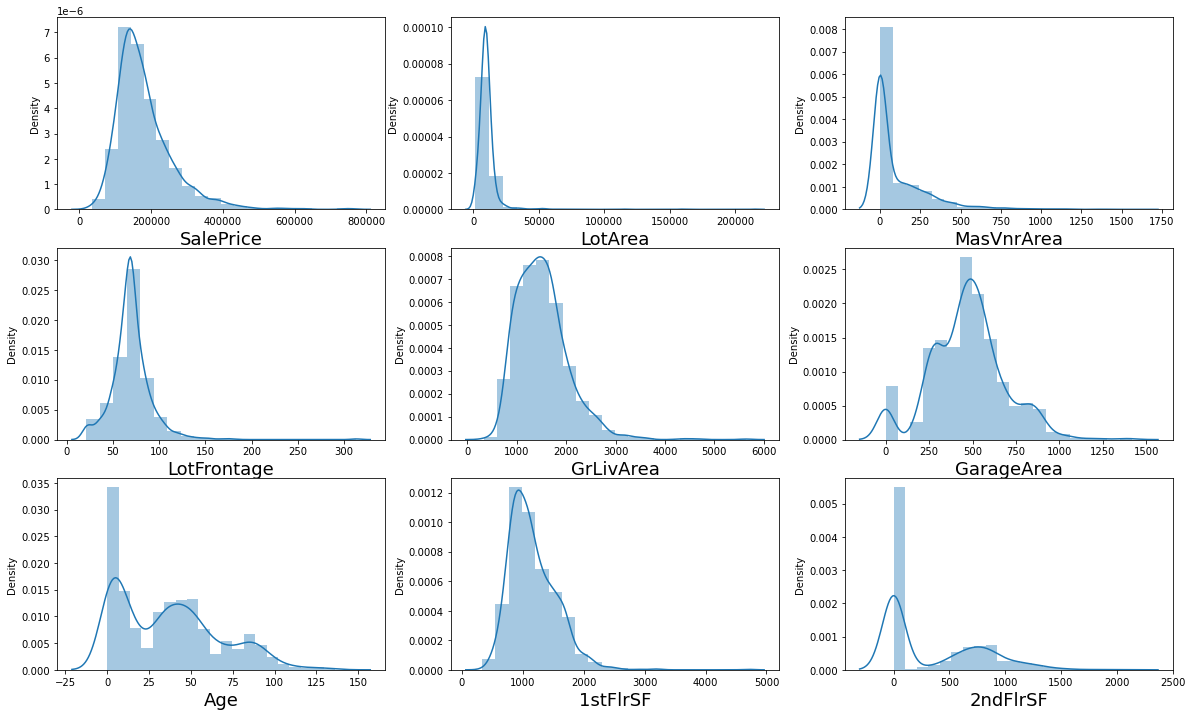

In [754]:
#Plotting BoxPlots for the Categorical Variables
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.distplot((housing['SalePrice']), bins = 20)
fig.suptitle('SalePrice', fontsize = 20)                  # Plot heading 
plt.xlabel('SalePrice', fontsize = 18)  
plt.subplot(3,3,2)
sns.distplot((housing['LotArea']), bins = 20)
fig.suptitle('LotArea', fontsize = 20)                  # Plot heading 
plt.xlabel('LotArea', fontsize = 18)  
plt.subplot(3,3,3)
sns.distplot((housing['MasVnrArea']), bins = 20)
fig.suptitle('MasVnrArea', fontsize = 20)                  # Plot heading 
plt.xlabel('MasVnrArea', fontsize = 18)  
plt.subplot(3,3,4)
sns.distplot((housing['LotFrontage']), bins = 20)
fig.suptitle('LotFrontage', fontsize = 20)                  # Plot heading 
plt.xlabel('LotFrontage', fontsize = 18) 
plt.subplot(3,3,5)
sns.distplot((housing['GrLivArea']), bins = 20)
fig.suptitle('GrLivArea', fontsize = 20)                  # Plot heading 
plt.xlabel('GrLivArea', fontsize = 18)  
plt.subplot(3,3,6)
sns.distplot((housing['GarageArea']), bins = 20)
fig.suptitle('GarageArea', fontsize = 20)                  # Plot heading 
plt.xlabel('GarageArea', fontsize = 18)  
plt.subplot(3,3,7)
sns.distplot((housing['Age']), bins = 20)
fig.suptitle('Age', fontsize = 20)                  # Plot heading 
plt.xlabel('Age', fontsize = 18)  
plt.subplot(3,3,8)
sns.distplot((housing['1stFlrSF']), bins = 20)
fig.suptitle('1stFlrSF', fontsize = 20)                  # Plot heading 
plt.xlabel('1stFlrSF', fontsize = 18)  
plt.subplot(3,3,9)
sns.distplot((housing['2ndFlrSF']), bins = 20)
fig.suptitle('2ndFlrSF', fontsize = 20)                  # Plot heading 
plt.xlabel('2ndFlrSF', fontsize = 18)  
plt.show()

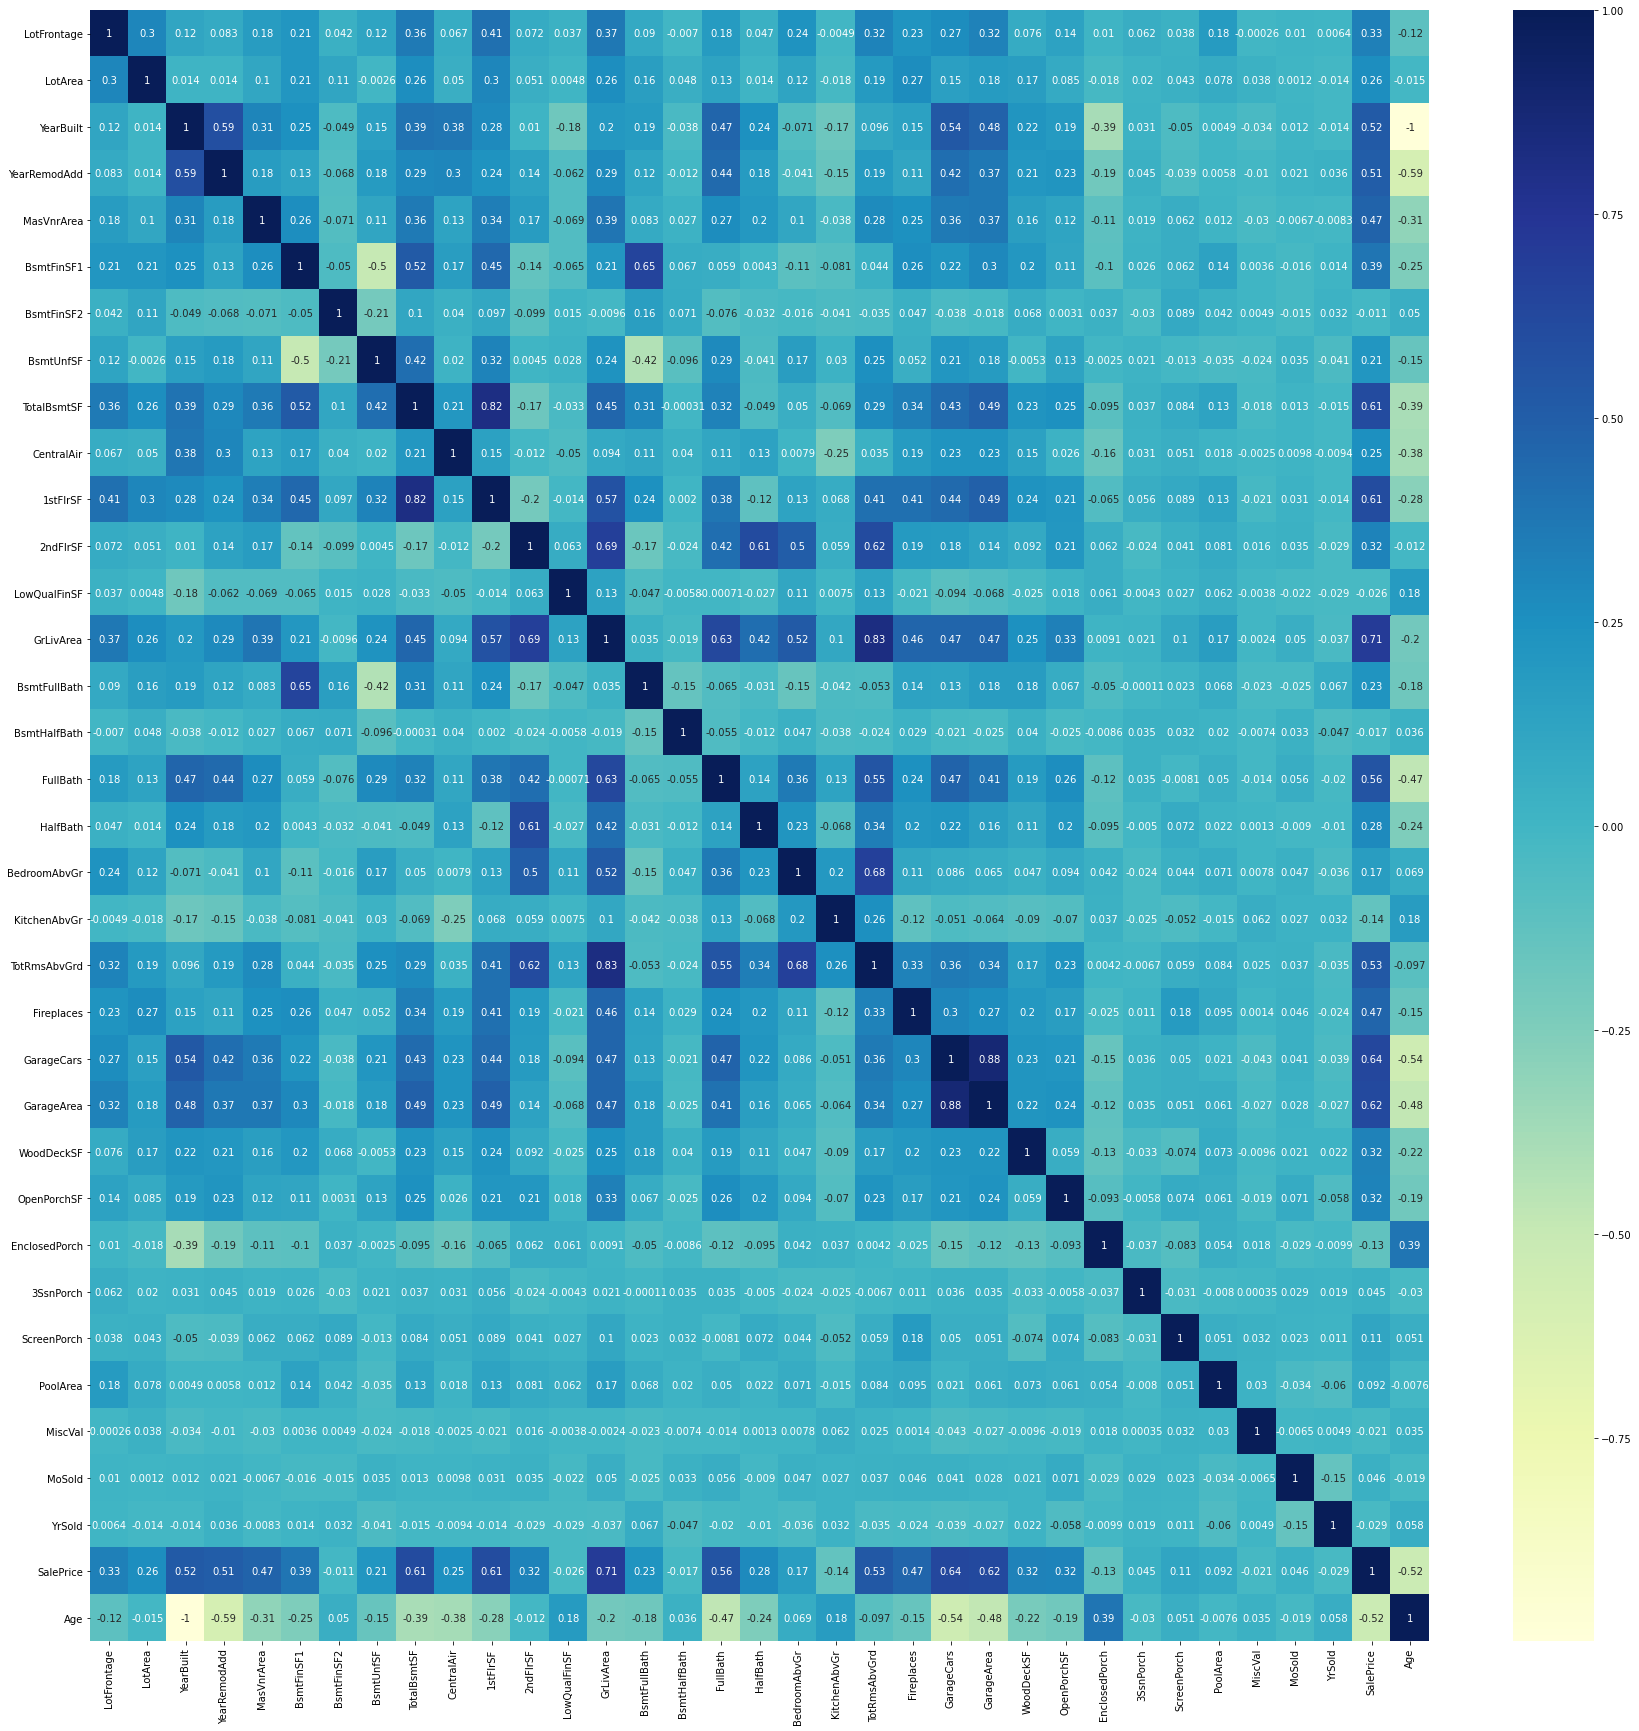

In [755]:
# Correlation Matrix
cor = housing_numeric.corr()
plt.figure(figsize=(30,30))
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

### <font color=green>8.3 Observation

<font color=blue>The following can be observed from the heatmap:

**Correlation of `SalePrice` with independent variables:**
- Price is highly (positively) correlated with `OveralQual`, `GrLivArea`, `GarageCars`, `GarageArea`, `1stFlrSF` and `TotalBsmtSF`.

**Correlation among independent variables:**
- Many independent variables are highly correlated : `TotRmsAbvGrd` and `GrLivArea`, `1stFlrSF` and `TotalBsmtSF` , GarageYrBlt and `YearBuilt`.

Thus, while building the model, we'll have to pay attention to **multicollinearity**.
    
-  It is also noticed from the histograms of the numerical variables that there are outliers present in most of them including the target variable.
Thus, before building the model, we'll have to properly **scale** them. **(StandardScaler)**

## <font color=red>9. Dummy Variables Creation  <a name='no9' />

### <font color=green> 9.1 Creating Dummy Variables for Categorical Variables

In [756]:
#Selecting only non-float and non-integer values for creating dummy variables
housing_categorical= housing.select_dtypes(exclude=['float64', 'int64'])
cat_col=housing_categorical.columns
status = pd.get_dummies(housing[cat_col], drop_first = True)
status.head()

,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_Low,OverallQual_Medium,OverallCond_Low,OverallCond_Medium,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NoBsmt,BsmtQual_TA,BsmtCond_Gd,BsmtCond_NoBsmt,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_NoBsmt,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NoBsmt,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NoBsmt,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NoFireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage,GarageFinish_NoGarage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NoGarage,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NoGarage,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_O

In [757]:
#Concating Dummy variables to main dataframe
housing = pd.concat([housing, status], axis = 1)
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Age,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_Low,OverallQual_Medium,OverallCond_Low,OverallCond_Medium,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NoBsmt,BsmtQual_TA,BsmtCond_Gd,BsmtCond_NoBsmt,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_NoBsmt,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NoBsmt,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NoBsmt,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_Oth

In [758]:
#Dropping original categorical columns
housing.drop(cat_col, axis = 1, inplace = True)
housing.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Age,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_Low,OverallQual_Medium,OverallCond_Low,OverallCond_Medium,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NoBsmt,BsmtQual_TA,BsmtCond_Gd,BsmtCond_NoBsmt,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_NoBsmt,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NoBsmt,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NoBsmt,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NoFireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarP

In [759]:
#checking Dataframe Shape
housing.shape

(1460, 260)

### <font color=green>9.2 Observation

-  <font color=blue> All categorical variables were converted to dummy variables and verified. The shape of the dataframe is now **1460 x 267.**

## <font color=red>10. Splitting the Data into Training and Testing Sets  <a name='no10' />

### <font color=green> 10.1 Train Test Split of 70-30 with Random State 100

In [760]:
#Splitting into train and test data with 70-30
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 100)

### <font color=green> 10.2 Scaling the Dataset (MinMax Scaling)

In [761]:
# Apply scaler() to all the columns except the 'Categorical variables
scaler = StandardScaler()
num_vars=housing.select_dtypes(include=['float64', 'int64'])
num_vars=num_vars.columns
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [762]:
#Checking the head of the train set
df_train.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Age,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_Low,OverallQual_Medium,OverallCond_Low,OverallCond_Medium,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NoBsmt,BsmtQual_TA,BsmtCond_Gd,BsmtCond_NoBsmt,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_NoBsmt,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NoBsmt,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NoBsmt,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NoFireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarP

In [763]:
# Checking the train set for Min-Max, Mean, Median and Mode
df_train.describe()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Age,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_Low,OverallQual_Medium,OverallCond_Low,OverallCond_Medium,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NoBsmt,BsmtQual_TA,BsmtCond_Gd,BsmtCond_NoBsmt,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_NoBsmt,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NoBsmt,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NoBsmt,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NoFireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarP

### <font color=green> 10.3 Dividing into X and Y sets for the model building

In [764]:
#Forming y_train by taking out target variable 
y_train = df_train.pop('SalePrice')
X_train = df_train

## <font color=red>11. Using RFE to get Top 30 Features  <a name='no11' />

In [765]:
# Running RFE with the output number of the variable equal to 30
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 30)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [766]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 180),
 ('LotArea', False, 70),
 ('YearBuilt', False, 36),
 ('YearRemodAdd', False, 73),
 ('MasVnrArea', False, 179),
 ('BsmtFinSF1', False, 24),
 ('BsmtFinSF2', False, 25),
 ('BsmtUnfSF', False, 26),
 ('TotalBsmtSF', False, 5),
 ('CentralAir', False, 217),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 22),
 ('GrLivArea', False, 3),
 ('BsmtFullBath', False, 202),
 ('BsmtHalfBath', False, 230),
 ('FullBath', False, 211),
 ('HalfBath', False, 138),
 ('BedroomAbvGr', False, 95),
 ('KitchenAbvGr', False, 216),
 ('TotRmsAbvGrd', False, 222),
 ('Fireplaces', False, 149),
 ('GarageCars', False, 218),
 ('GarageArea', False, 142),
 ('WoodDeckSF', False, 197),
 ('OpenPorchSF', False, 190),
 ('EnclosedPorch', False, 225),
 ('3SsnPorch', False, 206),
 ('ScreenPorch', False, 205),
 ('PoolArea', False, 92),
 ('MiscVal', False, 220),
 ('MoSold', False, 208),
 ('YrSold', False, 40),
 ('Age', False, 38),
 ('MSSubClass_1-1/2 STORY FINISHED ALL AGES', Fal

In [767]:
col = X_train.columns[rfe.support_]
col

Index(['1stFlrSF', '2ndFlrSF', 'MSSubClass_DUPLEX - ALL STYLES AND AGES',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'Condition2_PosN', 'Condition2_RRAe', 'Condition2_RRNn',
       'OverallQual_Medium', 'RoofStyle_Shed', 'RoofMatl_CompShg',
       'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll',
       'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl',
       'Exterior2nd_CBlock', 'ExterCond_Fa', 'ExterCond_Gd', 'ExterCond_TA',
       'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_TA', 'BsmtCond_NoBsmt',
       'BsmtFinType1_NoBsmt', 'Functional_Sev', 'Functional_Typ'],
      dtype='object')

In [768]:
X_train.columns[~rfe.support_]

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'CentralAir',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=229)

## <font color=red>12. Building Model 0 using OLS  <a name='no12' />

In [769]:
X_train_lm = X_train[col]

In [770]:
# Add a constant
X_train_lm = sm.add_constant(X_train_lm)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [771]:
# Check the parameters obtained
lr.params

const                                     -6.541201
1stFlrSF                                   0.565711
2ndFlrSF                                   0.387961
MSSubClass_DUPLEX - ALL STYLES AND AGES   -0.517063
MSZoning_FV                                0.861348
MSZoning_RH                                0.473969
MSZoning_RL                                0.751867
MSZoning_RM                                0.539412
Condition2_PosN                           -5.121496
Condition2_RRAe                           -2.317287
Condition2_RRNn                            0.480630
OverallQual_Medium                        -0.462124
RoofStyle_Shed                             1.740945
RoofMatl_CompShg                           7.120126
RoofMatl_Membran                           8.207306
RoofMatl_Metal                             7.882789
RoofMatl_Roll                              7.056686
RoofMatl_Tar&Grv                           7.233764
RoofMatl_WdShake                           6.163922
RoofMatl_WdS

In [772]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     198.1
Date:                Mon, 22 Mar 2021   Prob (F-statistic):               0.00
Time:                        15:48:20   Log-Likelihood:                -470.28
No. Observations:                1021   AIC:                             1001.
Df Residuals:                     991   BIC:                             1148.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

### <font color=green>12.1 Observation

- <font color=blue>Some of the **p-values are not really significant**. Also earlier we had looked at the correlation plot and obsrved that there could be **Multicollinearity effect**.
-  To understand and remove if any, we will look at the **Variance Inflation Factor (VIF)**.

## <font color=red>13. Using VIF to remove Multicollinearity  <a name='no13' />

In [773]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
28,BsmtFinType1_NoBsmt,inf
27,BsmtCond_NoBsmt,inf
0,const,1883.28
23,ExterCond_TA,56.28
22,ExterCond_Gd,49.15
6,MSZoning_RL,25.46
13,RoofMatl_CompShg,19.93
7,MSZoning_RM,19.86
21,ExterCond_Fa,9.92
17,RoofMatl_Tar&Grv,7.97


### <font color=green> 13.1 Dropping a Variable and updating the model - 1

In [774]:
# Dropping highly correlated variables and insignificant variables
X = X_train_lm.drop('Exterior2nd_CBlock', 1)
# Build a third fitted model
X_train_lm = sm.add_constant(X)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     205.1
Date:                Mon, 22 Mar 2021   Prob (F-statistic):               0.00
Time:                        15:48:21   Log-Likelihood:                -470.97
No. Observations:                1021   AIC:                             999.9
Df Residuals:                     992   BIC:                             1143.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -6.5409      0.529    -12.369      0.000      -7.579      -5.503
1stFlrSF                                    0.5661      0.017     34.060      0.000       0.533       0.599
2ndFlrSF                                    0.3877      0.013     29.124      0.000       0.362       0.414
MSSubClass_DUPLEX - ALL STYLES AND AGES    -0.5168      0.069     -7.472      0.000      -0.652      -0.381
MSZoning_FV                                 0.8604      0.161      5.336      0.000       0.544       1.177
MSZoning_RH                                 0.4736      0.184      2.571      0.010       0.112       0.835
MSZoning_RL                                 0.7504      0.150      5.010      0.000       0.456       1.044
MSZoning_RM                                 0.5391      0.152      3.552      0.000       0.241       0.837
Condition2_PosN                            -5.1221      0.400    -12.815      0.000      -5.906      -4.338
Condition2_RRAe                            -2.3176      0.601     -3.856      0.000      -3.497      -1.138
Condition2_RRNn                             0.4803      0.392      1.224      0.221      -0.290       1.250
OverallQual_Medium                         -0.4621      0.039    -11.864      0.000      -0.539      -0.386
RoofStyle_Shed                              1.7415      0.451      3.862      0.000       0.857       2.626
RoofMatl_CompShg                            7.1225      0.413     17.231      0.000       6.311       7.934
RoofMatl_Membran                            8.2089      0.572     14.352      0.000       7.086       9.331
RoofMatl_Metal                              7.8865      0.570     13.837      0.000       6.768       9.005
RoofMatl_Roll                               7.0607      0.574     12.292      0.000       5.933       8.188
RoofMatl_Tar&Grv                            7.2361      0.450     16.080      0.000       6.353       8.119
RoofMatl_WdShake                            6.1656      0.463     13.324      0.000       5.258       7.074
RoofMatl_WdShngl                            8.2308      0.451     18.265      0.000       7.346       9.115
ExterCond_Fa                               -0.6770      0.292     -2.321      0.020      -1.249      -0.105
ExterCond_Gd                               -0.4007      0.279     -1.437      0.151      -0.948       0.147
ExterCond_TA                               -0.4320      0.277     -1.560      0.119      -0.976       0.112
BsmtQual_Fa                                -1.1648      0.096    -12.155      0.000      -1.353      -0.977
BsmtQual_Gd                                -0.7235      0.051    -14.073      0.000      -0.824      -0.623
BsmtQual_TA                                -1.0542      0.0

### <font color=green> 13.2 Dropping a Variable and updating the model - 2

In [775]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('Condition2_RRNn', 1)
# Build a third fitted model
X_train_lm = sm.add_constant(X)
lr_2 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     212.5
Date:                Mon, 22 Mar 2021   Prob (F-statistic):               0.00
Time:                        15:48:21   Log-Likelihood:                -471.74
No. Observations:                1021   AIC:                             999.5
Df Residuals:                     993   BIC:                             1137.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -6.5393      0.529    -12.363      0.000      -7.577      -5.501
1stFlrSF                                    0.5658      0.017     34.037      0.000       0.533       0.598
2ndFlrSF                                    0.3872      0.013     29.093      0.000       0.361       0.413
MSSubClass_DUPLEX - ALL STYLES AND AGES    -0.5171      0.069     -7.475      0.000      -0.653      -0.381
MSZoning_FV                                 0.8616      0.161      5.342      0.000       0.545       1.178
MSZoning_RH                                 0.4749      0.184      2.577      0.010       0.113       0.836
MSZoning_RL                                 0.7510      0.150      5.013      0.000       0.457       1.045
MSZoning_RM                                 0.5425      0.152      3.575      0.000       0.245       0.840
Condition2_PosN                            -5.1192      0.400    -12.805      0.000      -5.904      -4.335
Condition2_RRAe                            -2.3160      0.601     -3.852      0.000      -3.496      -1.136
OverallQual_Medium                         -0.4624      0.039    -11.870      0.000      -0.539      -0.386
RoofStyle_Shed                              1.7420      0.451      3.862      0.000       0.857       2.627
RoofMatl_CompShg                            7.1191      0.413     17.219      0.000       6.308       7.930
RoofMatl_Membran                            8.2061      0.572     14.344      0.000       7.083       9.329
RoofMatl_Metal                              7.8830      0.570     13.828      0.000       6.764       9.002
RoofMatl_Roll                               7.0587      0.575     12.285      0.000       5.931       8.186
RoofMatl_Tar&Grv                            7.2324      0.450     16.068      0.000       6.349       8.116
RoofMatl_WdShake                            6.1623      0.463     13.313      0.000       5.254       7.071
RoofMatl_WdShngl                            8.2282      0.451     18.255      0.000       7.344       9.113
ExterCond_Fa                               -0.6764      0.292     -2.318      0.021      -1.249      -0.104
ExterCond_Gd                               -0.3955      0.279     -1.418      0.157      -0.943       0.152
ExterCond_TA                               -0.4311      0.277     -1.556      0.120      -0.975       0.113
BsmtQual_Fa                                -1.1669      0.096    -12.175      0.000      -1.355      -0.979
BsmtQual_Gd                                -0.7239      0.051    -14.077      0.000      -0.825      -0.623
BsmtQual_TA                                -1.0544      0.056    -18.848      0.000      -1.164      -0.945
BsmtCond_NoBsmt                            -0.6727      0.0

### <font color=green> 13.3 Dropping a Variable and updating the model - 3

In [776]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('ExterCond_Gd', 1)
# Build a third fitted model
X_train_lm = sm.add_constant(X)
lr_3 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model
lr_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     220.4
Date:                Mon, 22 Mar 2021   Prob (F-statistic):               0.00
Time:                        15:48:21   Log-Likelihood:                -472.77
No. Observations:                1021   AIC:                             999.5
Df Residuals:                     994   BIC:                             1133.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -6.9327      0.451    -15.386      0.000      -7.817      -6.048
1stFlrSF                                    0.5659      0.017     34.029      0.000       0.533       0.599
2ndFlrSF                                    0.3877      0.013     29.125      0.000       0.362       0.414
MSSubClass_DUPLEX - ALL STYLES AND AGES    -0.5176      0.069     -7.478      0.000      -0.653      -0.382
MSZoning_FV                                 0.8642      0.161      5.356      0.000       0.548       1.181
MSZoning_RH                                 0.4770      0.184      2.587      0.010       0.115       0.839
MSZoning_RL                                 0.7532      0.150      5.025      0.000       0.459       1.047
MSZoning_RM                                 0.5461      0.152      3.597      0.000       0.248       0.844
Condition2_PosN                            -5.1217      0.400    -12.804      0.000      -5.907      -4.337
Condition2_RRAe                            -2.3193      0.602     -3.855      0.000      -3.500      -1.139
OverallQual_Medium                         -0.4655      0.039    -11.962      0.000      -0.542      -0.389
RoofStyle_Shed                              1.7461      0.451      3.869      0.000       0.861       2.632
RoofMatl_CompShg                            7.1214      0.414     17.216      0.000       6.310       7.933
RoofMatl_Membran                            8.2109      0.572     14.345      0.000       7.088       9.334
RoofMatl_Metal                              7.8852      0.570     13.824      0.000       6.766       9.004
RoofMatl_Roll                               7.0603      0.575     12.282      0.000       5.932       8.188
RoofMatl_Tar&Grv                            7.2337      0.450     16.062      0.000       6.350       8.117
RoofMatl_WdShake                            6.1620      0.463     13.306      0.000       5.253       7.071
RoofMatl_WdShngl                            8.2302      0.451     18.250      0.000       7.345       9.115
ExterCond_Fa                               -0.2882      0.101     -2.855      0.004      -0.486      -0.090
ExterCond_TA                               -0.0425      0.041     -1.045      0.296      -0.122       0.037
BsmtQual_Fa                                -1.1664      0.096    -12.165      0.000      -1.355      -0.978
BsmtQual_Gd                                -0.7226      0.051    -14.047      0.000      -0.823      -0.622
BsmtQual_TA                                -1.0512      0.056    -18.796      0.000      -1.161      -0.941
BsmtCond_NoBsmt                            -0.6715      0.047    -14.199      0.000      -0.764      -0.579
BsmtFinType1_NoBsmt                        -0.6715      0.0

### <font color=green> 13.4 Dropping a Variable and updating the model - 4

In [777]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('ExterCond_TA', 1)
# Build a third fitted model
X_train_lm = sm.add_constant(X)
lr_4 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model
lr_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     229.2
Date:                Mon, 22 Mar 2021   Prob (F-statistic):               0.00
Time:                        15:48:21   Log-Likelihood:                -473.33
No. Observations:                1021   AIC:                             998.7
Df Residuals:                     995   BIC:                             1127.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -6.9854      0.448    -15.601      0.000      -7.864      -6.107
1stFlrSF                                    0.5666      0.017     34.098      0.000       0.534       0.599
2ndFlrSF                                    0.3883      0.013     29.208      0.000       0.362       0.414
MSSubClass_DUPLEX - ALL STYLES AND AGES    -0.5199      0.069     -7.516      0.000      -0.656      -0.384
MSZoning_FV                                 0.8604      0.161      5.334      0.000       0.544       1.177
MSZoning_RH                                 0.4708      0.184      2.555      0.011       0.109       0.832
MSZoning_RL                                 0.7524      0.150      5.019      0.000       0.458       1.047
MSZoning_RM                                 0.5481      0.152      3.610      0.000       0.250       0.846
Condition2_PosN                            -5.1273      0.400    -12.819      0.000      -5.912      -4.342
Condition2_RRAe                            -2.3097      0.602     -3.840      0.000      -3.490      -1.129
OverallQual_Medium                         -0.4654      0.039    -11.958      0.000      -0.542      -0.389
RoofStyle_Shed                              1.7337      0.451      3.843      0.000       0.848       2.619
RoofMatl_CompShg                            7.1289      0.414     17.236      0.000       6.317       7.941
RoofMatl_Membran                            8.2190      0.572     14.360      0.000       7.096       9.342
RoofMatl_Metal                              7.8868      0.570     13.827      0.000       6.768       9.006
RoofMatl_Roll                               7.0628      0.575     12.286      0.000       5.935       8.191
RoofMatl_Tar&Grv                            7.2476      0.450     16.099      0.000       6.364       8.131
RoofMatl_WdShake                            6.1784      0.463     13.349      0.000       5.270       7.087
RoofMatl_WdShngl                            8.2337      0.451     18.258      0.000       7.349       9.119
ExterCond_Fa                               -0.2512      0.095     -2.657      0.008      -0.437      -0.066
BsmtQual_Fa                                -1.1579      0.096    -12.119      0.000      -1.345      -0.970
BsmtQual_Gd                                -0.7196      0.051    -14.010      0.000      -0.820      -0.619
BsmtQual_TA                                -1.0449      0.056    -18.791      0.000      -1.154      -0.936
BsmtCond_NoBsmt                            -0.6707      0.047    -14.184      0.000      -0.763      -0.578
BsmtFinType1_NoBsmt                        -0.6707      0.047    -14.184      0.000      -0.763      -0.578
Functional_Sev                             -1.4136      0.4

In [778]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
24,BsmtFinType1_NoBsmt,inf
23,BsmtCond_NoBsmt,inf
0,const,1348.08
6,MSZoning_RL,25.46
12,RoofMatl_CompShg,19.92
7,MSZoning_RM,19.85
16,RoofMatl_Tar&Grv,7.96
4,MSZoning_FV,7.37
17,RoofMatl_WdShake,5.62
18,RoofMatl_WdShngl,5.34


### <font color=green> 13.5 Dropping a Variable and updating the model - 5

In [779]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('BsmtFinType1_NoBsmt', 1)
# Build a third fitted model
X_train_lm = sm.add_constant(X)
lr_5 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model
lr_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     229.2
Date:                Mon, 22 Mar 2021   Prob (F-statistic):               0.00
Time:                        15:48:21   Log-Likelihood:                -473.33
No. Observations:                1021   AIC:                             998.7
Df Residuals:                     995   BIC:                             1127.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -6.9854      0.448    -15.601      0.000      -7.864      -6.107
1stFlrSF                                    0.5666      0.017     34.098      0.000       0.534       0.599
2ndFlrSF                                    0.3883      0.013     29.208      0.000       0.362       0.414
MSSubClass_DUPLEX - ALL STYLES AND AGES    -0.5199      0.069     -7.516      0.000      -0.656      -0.384
MSZoning_FV                                 0.8604      0.161      5.334      0.000       0.544       1.177
MSZoning_RH                                 0.4708      0.184      2.555      0.011       0.109       0.832
MSZoning_RL                                 0.7524      0.150      5.019      0.000       0.458       1.047
MSZoning_RM                                 0.5481      0.152      3.610      0.000       0.250       0.846
Condition2_PosN                            -5.1273      0.400    -12.819      0.000      -5.912      -4.342
Condition2_RRAe                            -2.3097      0.602     -3.840      0.000      -3.490      -1.129
OverallQual_Medium                         -0.4654      0.039    -11.958      0.000      -0.542      -0.389
RoofStyle_Shed                              1.7337      0.451      3.843      0.000       0.848       2.619
RoofMatl_CompShg                            7.1289      0.414     17.236      0.000       6.317       7.941
RoofMatl_Membran                            8.2190      0.572     14.360      0.000       7.096       9.342
RoofMatl_Metal                              7.8868      0.570     13.827      0.000       6.768       9.006
RoofMatl_Roll                               7.0628      0.575     12.286      0.000       5.935       8.191
RoofMatl_Tar&Grv                            7.2476      0.450     16.099      0.000       6.364       8.131
RoofMatl_WdShake                            6.1784      0.463     13.349      0.000       5.270       7.087
RoofMatl_WdShngl                            8.2337      0.451     18.258      0.000       7.349       9.119
ExterCond_Fa                               -0.2512      0.095     -2.657      0.008      -0.437      -0.066
BsmtQual_Fa                                -1.1579      0.096    -12.119      0.000      -1.345      -0.970
BsmtQual_Gd                                -0.7196      0.051    -14.010      0.000      -0.820      -0.619
BsmtQual_TA                                -1.0449      0.056    -18.791      0.000      -1.154      -0.936
BsmtCond_NoBsmt                            -1.3413      0.095    -14.184      0.000      -1.527      -1.156
Functional_Sev                             -1.4136      0.429     -3.298      0.001      -2.255      -0.572
Functional_Typ                              0.4137      0.0

In [780]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,1348.08
6,MSZoning_RL,25.46
12,RoofMatl_CompShg,19.92
7,MSZoning_RM,19.85
16,RoofMatl_Tar&Grv,7.96
4,MSZoning_FV,7.37
17,RoofMatl_WdShake,5.62
18,RoofMatl_WdShngl,5.34
22,BsmtQual_TA,5.13
21,BsmtQual_Gd,4.32


### <font color=green> 13.6 Dropping a Variable and updating the model - 6

In [781]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('MSZoning_RL', 1)
# Build a third fitted model
X_train_lm = sm.add_constant(X)
lr_6 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model
lr_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     232.0
Date:                Mon, 22 Mar 2021   Prob (F-statistic):               0.00
Time:                        15:48:21   Log-Likelihood:                -486.10
No. Observations:                1021   AIC:                             1022.
Df Residuals:                     996   BIC:                             1145.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -6.2854      0.431    -14.596      0.000      -7.130      -5.440
1stFlrSF                                    0.5730      0.017     34.170      0.000       0.540       0.606
2ndFlrSF                                    0.3898      0.013     28.977      0.000       0.363       0.416
MSSubClass_DUPLEX - ALL STYLES AND AGES    -0.5190      0.070     -7.413      0.000      -0.656      -0.382
MSZoning_FV                                 0.1131      0.063      1.801      0.072      -0.010       0.236
MSZoning_RH                                -0.2722      0.111     -2.451      0.014      -0.490      -0.054
MSZoning_RM                                -0.1913      0.037     -5.148      0.000      -0.264      -0.118
Condition2_PosN                            -5.1507      0.405    -12.725      0.000      -5.945      -4.356
Condition2_RRAe                            -2.3251      0.609     -3.819      0.000      -3.520      -1.130
OverallQual_Medium                         -0.4506      0.039    -11.472      0.000      -0.528      -0.373
RoofStyle_Shed                              1.7407      0.457      3.813      0.000       0.845       2.637
RoofMatl_CompShg                            7.1751      0.418     17.145      0.000       6.354       7.996
RoofMatl_Membran                            8.2560      0.579     14.254      0.000       7.119       9.393
RoofMatl_Metal                              7.9492      0.577     13.773      0.000       6.817       9.082
RoofMatl_Roll                               7.1218      0.582     12.243      0.000       5.980       8.263
RoofMatl_Tar&Grv                            7.2953      0.456     16.016      0.000       6.401       8.189
RoofMatl_WdShake                            6.2144      0.468     13.268      0.000       5.295       7.134
RoofMatl_WdShngl                            8.2784      0.456     18.142      0.000       7.383       9.174
ExterCond_Fa                               -0.2848      0.095     -2.983      0.003      -0.472      -0.097
BsmtQual_Fa                                -1.1606      0.097    -12.003      0.000      -1.350      -0.971
BsmtQual_Gd                                -0.7210      0.052    -13.869      0.000      -0.823      -0.619
BsmtQual_TA                                -1.0595      0.056    -18.852      0.000      -1.170      -0.949
BsmtCond_NoBsmt                            -1.3408      0.096    -14.009      0.000      -1.529      -1.153
Functional_Sev                             -1.4291      0.434     -3.294      0.001      -2.280      -0.578
Functional_Typ                              0.4075      0.054      7.568      0.000       0.302       0.513
===========================================================

### <font color=green> 13.7 Dropping a Variable and updating the model - 7

In [782]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('MSZoning_FV', 1)
# Build a third fitted model
X_train_lm = sm.add_constant(X)
lr_7 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model
lr_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     241.4
Date:                Mon, 22 Mar 2021   Prob (F-statistic):               0.00
Time:                        15:48:22   Log-Likelihood:                -487.76
No. Observations:                1021   AIC:                             1024.
Df Residuals:                     997   BIC:                             1142.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -6.2427      0.430    -14.503      0.000      -7.087      -5.398
1stFlrSF                                    0.5681      0.017     34.295      0.000       0.536       0.601
2ndFlrSF                                    0.3906      0.013     29.014      0.000       0.364       0.417
MSSubClass_DUPLEX - ALL STYLES AND AGES    -0.5183      0.070     -7.394      0.000      -0.656      -0.381
MSZoning_RH                                -0.2766      0.111     -2.488      0.013      -0.495      -0.058
MSZoning_RM                                -0.1972      0.037     -5.323      0.000      -0.270      -0.124
Condition2_PosN                            -5.1429      0.405    -12.692      0.000      -5.938      -4.348
Condition2_RRAe                            -2.3290      0.609     -3.822      0.000      -3.525      -1.133
OverallQual_Medium                         -0.4534      0.039    -11.540      0.000      -0.530      -0.376
RoofStyle_Shed                              1.7343      0.457      3.795      0.000       0.837       2.631
RoofMatl_CompShg                            7.1472      0.419     17.071      0.000       6.326       7.969
RoofMatl_Membran                            8.2203      0.580     14.184      0.000       7.083       9.358
RoofMatl_Metal                              7.9194      0.578     13.712      0.000       6.786       9.053
RoofMatl_Roll                               7.0889      0.582     12.179      0.000       5.947       8.231
RoofMatl_Tar&Grv                            7.2642      0.456     15.941      0.000       6.370       8.158
RoofMatl_WdShake                            6.1846      0.469     13.197      0.000       5.265       7.104
RoofMatl_WdShngl                            8.2480      0.457     18.067      0.000       7.352       9.144
ExterCond_Fa                               -0.2863      0.096     -2.996      0.003      -0.474      -0.099
BsmtQual_Fa                                -1.1727      0.097    -12.143      0.000      -1.362      -0.983
BsmtQual_Gd                                -0.7222      0.052    -13.878      0.000      -0.824      -0.620
BsmtQual_TA                                -1.0710      0.056    -19.158      0.000      -1.181      -0.961
BsmtCond_NoBsmt                            -1.3527      0.096    -14.151      0.000      -1.540      -1.165
Functional_Sev                             -1.4340      0.434     -3.302      0.001      -2.286      -0.582
Functional_Typ                              0.4073      0.054      7.556      0.000       0.302       0.513
==============================================================================
Omnibus:                      162.757   Durbin-Watson:                   2.013
Prob(Omni

In [783]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,1213.62
10,RoofMatl_CompShg,19.88
14,RoofMatl_Tar&Grv,7.95
15,RoofMatl_WdShake,5.61
16,RoofMatl_WdShngl,5.33
20,BsmtQual_TA,5.05
19,BsmtQual_Gd,4.32
9,RoofStyle_Shed,2.67
7,Condition2_RRAe,2.38
13,RoofMatl_Roll,2.17


### <font color=green> 13.8 Dropping a Variable and updating the model - 8

In [784]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('RoofMatl_CompShg', 1)
# Build a third fitted model
X_train_lm = sm.add_constant(X)
lr_8 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model
lr_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     185.2
Date:                Mon, 22 Mar 2021   Prob (F-statistic):               0.00
Time:                        15:48:22   Log-Likelihood:                -618.66
No. Observations:                1021   AIC:                             1283.
Df Residuals:                     998   BIC:                             1397.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       0.9917      0.086     11.565      0.000       0.823       1.160
1stFlrSF                                    0.4796      0.018     26.829      0.000       0.444       0.515
2ndFlrSF                                    0.3589      0.015     23.689      0.000       0.329       0.389
MSSubClass_DUPLEX - ALL STYLES AND AGES    -0.4546      0.080     -5.716      0.000      -0.611      -0.299
MSZoning_RH                                -0.2827      0.126     -2.238      0.025      -0.531      -0.035
MSZoning_RM                                -0.2360      0.042     -5.617      0.000      -0.318      -0.154
Condition2_PosN                            -4.6544      0.459    -10.135      0.000      -5.556      -3.753
Condition2_RRAe                            -2.1199      0.692     -3.062      0.002      -3.478      -0.761
OverallQual_Medium                         -0.5036      0.045    -11.314      0.000      -0.591      -0.416
RoofStyle_Shed                              1.5738      0.519      3.031      0.002       0.555       2.593
RoofMatl_Membran                            1.0439      0.453      2.303      0.021       0.154       1.933
RoofMatl_Metal                              0.7344      0.449      1.634      0.103      -0.147       1.616
RoofMatl_Roll                              -0.1009      0.456     -0.221      0.825      -0.997       0.795
RoofMatl_Tar&Grv                            0.1176      0.204      0.575      0.565      -0.284       0.519
RoofMatl_WdShake                           -0.7739      0.263     -2.946      0.003      -1.289      -0.258
RoofMatl_WdShngl                            1.2378      0.227      5.463      0.000       0.793       1.682
ExterCond_Fa                               -0.3117      0.109     -2.871      0.004      -0.525      -0.099
BsmtQual_Fa                                -1.2025      0.110    -10.961      0.000      -1.418      -0.987
BsmtQual_Gd                                -0.7115      0.059    -12.035      0.000      -0.828      -0.596
BsmtQual_TA                                -1.0849      0.064    -17.082      0.000      -1.210      -0.960
BsmtCond_NoBsmt                            -1.3969      0.109    -12.866      0.000      -1.610      -1.184
Functional_Sev                             -1.3745      0.493     -2.785      0.005      -2.343      -0.406
Functional_Typ                              0.3570      0.061      5.837      0.000       0.237       0.477
==============================================================================
Omnibus:                      686.505   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            85400.712
Skew:                          -2.157 

### <font color=green> 13.9 Dropping a Variable and updating the model - 9

In [785]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('RoofMatl_Roll', 1)
# Build a third fitted model
X_train_lm = sm.add_constant(X)
lr_9 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model
lr_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     194.2
Date:                Mon, 22 Mar 2021   Prob (F-statistic):               0.00
Time:                        15:48:22   Log-Likelihood:                -618.68
No. Observations:                1021   AIC:                             1281.
Df Residuals:                     999   BIC:                             1390.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       0.9914      0.086     11.569      0.000       0.823       1.160
1stFlrSF                                    0.4797      0.018     26.858      0.000       0.445       0.515
2ndFlrSF                                    0.3587      0.015     23.720      0.000       0.329       0.388
MSSubClass_DUPLEX - ALL STYLES AND AGES    -0.4575      0.078     -5.840      0.000      -0.611      -0.304
MSZoning_RH                                -0.2822      0.126     -2.236      0.026      -0.530      -0.034
MSZoning_RM                                -0.2357      0.042     -5.615      0.000      -0.318      -0.153
Condition2_PosN                            -4.6544      0.459    -10.139      0.000      -5.555      -3.754
Condition2_RRAe                            -2.1167      0.692     -3.059      0.002      -3.474      -0.759
OverallQual_Medium                         -0.5036      0.044    -11.318      0.000      -0.591      -0.416
RoofStyle_Shed                              1.5738      0.519      3.033      0.002       0.555       2.592
RoofMatl_Membran                            1.0437      0.453      2.304      0.021       0.155       1.933
RoofMatl_Metal                              0.7345      0.449      1.635      0.102      -0.147       1.616
RoofMatl_Tar&Grv                            0.1174      0.204      0.574      0.566      -0.284       0.518
RoofMatl_WdShake                           -0.7740      0.263     -2.948      0.003      -1.289      -0.259
RoofMatl_WdShngl                            1.2378      0.226      5.465      0.000       0.793       1.682
ExterCond_Fa                               -0.3116      0.109     -2.871      0.004      -0.525      -0.099
BsmtQual_Fa                                -1.2024      0.110    -10.966      0.000      -1.418      -0.987
BsmtQual_Gd                                -0.7113      0.059    -12.039      0.000      -0.827      -0.595
BsmtQual_TA                                -1.0850      0.063    -17.092      0.000      -1.210      -0.960
BsmtCond_NoBsmt                            -1.3955      0.108    -12.881      0.000      -1.608      -1.183
Functional_Sev                             -1.3741      0.493     -2.786      0.005      -2.342      -0.406
Functional_Typ                              0.3571      0.061      5.841      0.000       0.237       0.477
==============================================================================
Omnibus:                      686.540   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            85446.610
Skew:                          -2.157   Prob(JB):                         0.00
Kurtosis:                      47.609   Cond. No.                  

### <font color=green> 13.10 Dropping a Variable and updating the model - 10

In [786]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('RoofMatl_Tar&Grv', 1)
# Build a third fitted model
X_train_lm = sm.add_constant(X)
lr_10 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model
lr_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     204.1
Date:                Mon, 22 Mar 2021   Prob (F-statistic):               0.00
Time:                        15:48:22   Log-Likelihood:                -618.85
No. Observations:                1021   AIC:                             1280.
Df Residuals:                    1000   BIC:                             1383.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       0.9968      0.085     11.705      0.000       0.830       1.164
1stFlrSF                                    0.4797      0.018     26.869      0.000       0.445       0.515
2ndFlrSF                                    0.3585      0.015     23.721      0.000       0.329       0.388
MSSubClass_DUPLEX - ALL STYLES AND AGES    -0.4589      0.078     -5.862      0.000      -0.613      -0.305
MSZoning_RH                                -0.2825      0.126     -2.239      0.025      -0.530      -0.035
MSZoning_RM                                -0.2364      0.042     -5.637      0.000      -0.319      -0.154
Condition2_PosN                            -4.6541      0.459    -10.142      0.000      -5.555      -3.754
Condition2_RRAe                            -2.1153      0.692     -3.059      0.002      -3.473      -0.758
OverallQual_Medium                         -0.5040      0.044    -11.332      0.000      -0.591      -0.417
RoofStyle_Shed                              1.5738      0.519      3.034      0.002       0.556       2.592
RoofMatl_Membran                            1.0378      0.453      2.292      0.022       0.149       1.926
RoofMatl_Metal                              0.7341      0.449      1.635      0.102      -0.147       1.615
RoofMatl_WdShake                           -0.7745      0.262     -2.951      0.003      -1.290      -0.260
RoofMatl_WdShngl                            1.2376      0.226      5.466      0.000       0.793       1.682
ExterCond_Fa                               -0.3135      0.108     -2.891      0.004      -0.526      -0.101
BsmtQual_Fa                                -1.2029      0.110    -10.974      0.000      -1.418      -0.988
BsmtQual_Gd                                -0.7106      0.059    -12.033      0.000      -0.826      -0.595
BsmtQual_TA                                -1.0844      0.063    -17.091      0.000      -1.209      -0.960
BsmtCond_NoBsmt                            -1.3914      0.108    -12.875      0.000      -1.603      -1.179
Functional_Sev                             -1.2623      0.453     -2.787      0.005      -2.151      -0.373
Functional_Typ                              0.3517      0.060      5.823      0.000       0.233       0.470
==============================================================================
Omnibus:                      685.987   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            85355.163
Skew:                          -2.154   Prob(JB):                         0.00
Kurtosis:                      47.585   Cond. No.                         102.
==============================================================================

Notes:
[1] Stand

### <font color=green> 13.11 Dropping a Variable and updating the model - 11

In [787]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('RoofMatl_Metal', 1)
# Build a third fitted model
X_train_lm = sm.add_constant(X)
lr_11 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model
lr_11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     214.3
Date:                Mon, 22 Mar 2021   Prob (F-statistic):               0.00
Time:                        15:48:22   Log-Likelihood:                -620.21
No. Observations:                1021   AIC:                             1280.
Df Residuals:                    1001   BIC:                             1379.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       0.9966      0.085     11.693      0.000       0.829       1.164
1stFlrSF                                    0.4793      0.018     26.825      0.000       0.444       0.514
2ndFlrSF                                    0.3580      0.015     23.672      0.000       0.328       0.388
MSSubClass_DUPLEX - ALL STYLES AND AGES    -0.4596      0.078     -5.867      0.000      -0.613      -0.306
MSZoning_RH                                -0.2838      0.126     -2.247      0.025      -0.532      -0.036
MSZoning_RM                                -0.2379      0.042     -5.669      0.000      -0.320      -0.156
Condition2_PosN                            -4.6512      0.459    -10.127      0.000      -5.552      -3.750
Condition2_RRAe                            -2.1123      0.692     -3.052      0.002      -3.471      -0.754
OverallQual_Medium                         -0.5040      0.045    -11.324      0.000      -0.591      -0.417
RoofStyle_Shed                              1.5726      0.519      3.029      0.003       0.554       2.591
RoofMatl_Membran                            1.0382      0.453      2.291      0.022       0.149       1.927
RoofMatl_WdShake                           -0.7736      0.263     -2.945      0.003      -1.289      -0.258
RoofMatl_WdShngl                            1.2375      0.227      5.461      0.000       0.793       1.682
ExterCond_Fa                               -0.3146      0.109     -2.899      0.004      -0.528      -0.102
BsmtQual_Fa                                -1.2025      0.110    -10.962      0.000      -1.418      -0.987
BsmtQual_Gd                                -0.7110      0.059    -12.029      0.000      -0.827      -0.595
BsmtQual_TA                                -1.0831      0.063    -17.057      0.000      -1.208      -0.958
BsmtCond_NoBsmt                            -1.3914      0.108    -12.865      0.000      -1.604      -1.179
Functional_Sev                             -1.2606      0.453     -2.781      0.006      -2.150      -0.371
Functional_Typ                              0.3526      0.060      5.833      0.000       0.234       0.471
==============================================================================
Omnibus:                      682.151   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            84087.660
Skew:                          -2.137   Prob(JB):                         0.00
Kurtosis:                      47.253   Cond. No.                         102.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [788]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,36.85
16,BsmtQual_TA,5.05
15,BsmtQual_Gd,4.31
9,RoofStyle_Shed,2.67
7,Condition2_RRAe,2.38
17,BsmtCond_NoBsmt,1.64
1,1stFlrSF,1.62
8,OverallQual_Medium,1.48
14,BsmtQual_Fa,1.46
11,RoofMatl_WdShake,1.37


### <font color=green> 13.12 Dropping a Variable and updating the model - 12

In [789]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('BsmtQual_TA', 1)
# Build a third fitted model
X_train_lm = sm.add_constant(X)
lr_12=sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model
lr_12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     162.9
Date:                Mon, 22 Mar 2021   Prob (F-statistic):          2.48e-282
Time:                        15:48:22   Log-Likelihood:                -750.47
No. Observations:                1021   AIC:                             1539.
Df Residuals:                    1002   BIC:                             1633.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       0.2392      0.083      2.896      0.004       0.077       0.401
1stFlrSF                                    0.5611      0.020     28.715      0.000       0.523       0.599
2ndFlrSF                                    0.3863      0.017     22.628      0.000       0.353       0.420
MSSubClass_DUPLEX - ALL STYLES AND AGES    -0.5618      0.089     -6.333      0.000      -0.736      -0.388
MSZoning_RH                                -0.3613      0.143     -2.521      0.012      -0.643      -0.080
MSZoning_RM                                -0.2584      0.048     -5.425      0.000      -0.352      -0.165
Condition2_PosN                            -4.4757      0.521     -8.585      0.000      -5.499      -3.453
Condition2_RRAe                            -2.3013      0.786     -2.928      0.003      -3.843      -0.759
OverallQual_Medium                         -0.7719      0.047    -16.322      0.000      -0.865      -0.679
RoofStyle_Shed                              1.8248      0.589      3.096      0.002       0.668       2.981
RoofMatl_Membran                            1.1796      0.514      2.293      0.022       0.170       2.189
RoofMatl_WdShake                           -0.9895      0.298     -3.321      0.001      -1.574      -0.405
RoofMatl_WdShngl                            1.4061      0.257      5.470      0.000       0.902       1.911
ExterCond_Fa                               -0.4018      0.123     -3.264      0.001      -0.643      -0.160
BsmtQual_Fa                                -0.2219      0.106     -2.092      0.037      -0.430      -0.014
BsmtQual_Gd                                 0.1551      0.034      4.515      0.000       0.088       0.223
BsmtCond_NoBsmt                            -0.4324      0.105     -4.122      0.000      -0.638      -0.227
Functional_Sev                             -1.1996      0.515     -2.330      0.020      -2.210      -0.189
Functional_Typ                              0.4516      0.068      6.609      0.000       0.318       0.586
==============================================================================
Omnibus:                      458.197   Durbin-Watson:                   2.182
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            39626.244
Skew:                          -1.126   Prob(JB):                         0.00
Kurtosis:                      33.437   Cond. No.                         98.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [790]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,26.85
9,RoofStyle_Shed,2.67
7,Condition2_RRAe,2.38
1,1stFlrSF,1.50
11,RoofMatl_WdShake,1.36
8,OverallQual_Medium,1.29
3,MSSubClass_DUPLEX - ALL STYLES AND AGES,1.22
16,BsmtCond_NoBsmt,1.20
2,2ndFlrSF,1.15
5,MSZoning_RM,1.14


### <font color=green>13.14 Observation

-  <font color=blue>After **13 iterations** of removing insignificant variables and checking VIF, we have arrived at the final model where all **p-values are significant** and all **VIF values are normal**.

## <font color=red>14.Making Predictions on the Test Set and Evaluating the Model  <a name='no14' />

In [791]:
num_vars=housing.select_dtypes(include=['float64', 'int64'])
num_vars=num_vars.columns
df_test[num_vars] = scaler.transform(df_test[num_vars])
#Forming y_train by taking out target variable 
y_test = df_test.pop('SalePrice')
X_test = df_test
col_new=X.columns
X_test = sm.add_constant(X_test)
X_test=X_test[col_new]

### <font color=green>14.1 Checking the accuracy metrics of Linear Regression

In [792]:
y_pred_train = lr_12.predict(X_train_lm)
y_pred_test = lr_12.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 SCORE TRAIN:")
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 SCORE TEST:")
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS TRAIN:")
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS TEST:")
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("MSE TRAIN:")
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("MSE TEST:")
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

R2 SCORE TRAIN:
0.7453368232042373
R2 SCORE TEST:
0.6781972964355615
RSS TRAIN:
260.01110350847364
RSS TEST:
145.14362729097695
MSE TRAIN:
0.2546631767957626
MSE TEST:
0.3313781444999474


### <font color=green>14.2 Checking the Y_Test and Y_Predicted

Text(0, 0.5, 'y_pred')

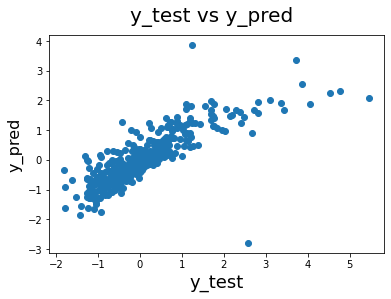

In [793]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred_test)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

### <font color=green>14.3 Checking the histogram of error terms

Text(0.5, 0, 'Errors')

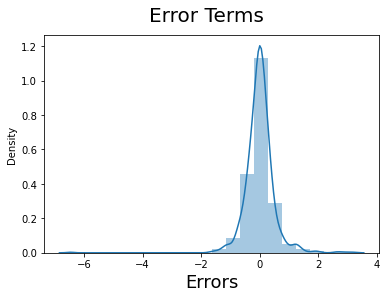

In [794]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_pred_train), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### <font color=green>14.4 Observation

-  <font color=blue>The Linear Regression has given a **train** R2 Score of **74.53%** and **test** R2 Score of **67.81%**.
-  On checking the **histogram of error terms** there is no abnormality.
-  Also the **y_test vs y_test_pred plot** seems normal.    

## <font color=red>15. Lasso Regression  <a name='no15' />

In [795]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
folds = 5

In [796]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_lm, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.9s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [797]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.001}


In [798]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised
alpha =0.001
lasso = Lasso(alpha=alpha)
lasso.fit(X_train_lm, y_train) 

Lasso(alpha=0.001)

In [799]:
lasso.coef_

array([ 0.        ,  0.54994311,  0.37499099, -0.55197098, -0.28163397,
       -0.25614747, -3.36214882, -0.        , -0.77471047,  0.        ,
        0.1441105 , -0.25032433,  1.17827576, -0.35533478, -0.18845364,
        0.15866623, -0.40609003, -0.16660577,  0.43502047])

### <font color=green>15.1 Checking the accuracy metrics of Lasso Regression

In [800]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train_lm)
y_pred_test = lasso.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 SCORE TRAIN:")
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 SCORE TEST:")
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS TRAIN:")
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS TEST:")
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("MSE TRAIN:")
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("MSE TEST:")
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

R2 SCORE TRAIN:
0.7387953595428145
R2 SCORE TEST:
0.7018423779449992
RSS TRAIN:
266.6899379067864
RSS TEST:
134.47891608794205
MSE TRAIN:
0.2612046404571855
MSE TEST:
0.3070294887852558


### <font color=green>15.2 Checking Y_Test and Y_Predicted

Text(0, 0.5, 'y_pred')

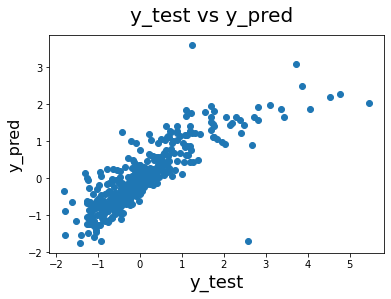

In [801]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred_test)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

### <font color=green>15.3 Checking the histogram of error terms

Text(0.5, 0, 'Errors')

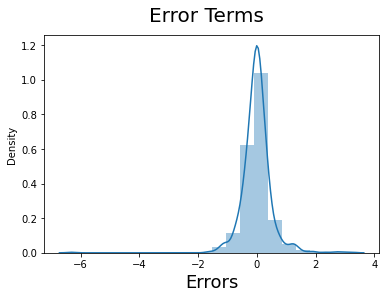

In [802]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_pred_train), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label


We can see that the equation of our best fitted line from Lasso Regression is:

$ SalePrice = 0.550  \times  1stFlrSF + 0.375  \times  2ndFlrSF - 0.552 \times MSSubClass_DUPLEX - ALL STYLES AND AGES - 0.282 \times MSZoning_RH - 0.256 \times MSZoning_RM - 3.362 \times Condition2_PosN - 0.775 \times OverallQual_Medium + 0.144 \times RoofMatl_Membran - 0.250 \times RoofMatl_WdShake + 1.178 \times RoofMatl_WdShngl - 0.355 \times ExterCond_Fa - 0.188 \times BsmtQual_Fa	 + 0.159 \times BsmtQual_Gd	 - 0.406 \times BsmtCond_NoBsmt - 0.167 \times Functional_Sev + 0.435 \times Functional_Typ $


### <font color=green>15.4 Observation

-  <font color=blue>The Lasso Regression has given a **train** R2 Score of **73.88%** and **test** R2 Score of **70.18%**.
-  On checking the **histogram of error terms** there is no abnormality.
-  Also the **y_test vs y_test_pred plot** seems normal.    

## <font color=red>16. Ridge Regression  <a name='no16' />

In [803]:
ridge = Ridge()
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_lm, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.9s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [804]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 6.0}


In [805]:
#Fitting Ridge model for alpha = 20 and printing coefficients which have been penalised
alpha = 6
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_lm, y_train)
print(ridge.coef_)

[ 0.          0.53676858  0.36499377 -0.50381598 -0.24937274 -0.25962319
 -0.60956204 -0.07958545 -0.75895283  0.08023557  0.16184078 -0.20012911
  0.58789394 -0.31538731 -0.18894792  0.17085845 -0.38409088 -0.17077457
  0.408631  ]


### <font color=green>16.1 Checking the accuracy metrics of Ridge Regression

In [806]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = ridge.predict(X_train_lm)
y_pred_test = ridge.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 SCORE TRAIN:")
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 SCORE TEST:")
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS TRAIN:")
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS TEST:")
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("MSE TRAIN:")
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("MSE TEST:")
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

R2 SCORE TRAIN:
0.7229634881501532
R2 SCORE TEST:
0.7371246140322905
RSS TRAIN:
282.8542785986936
RSS TEST:
118.56546456027134
MSE TRAIN:
0.27703651184984684
MSE TEST:
0.27069740767185235


### <font color=green>16.2 Checking Y_Test and Y_Predicted

Text(0, 0.5, 'y_pred')

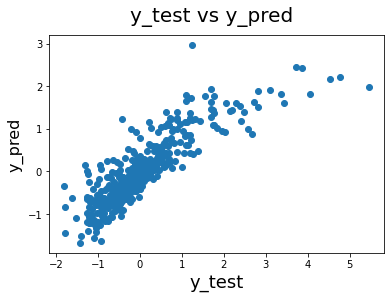

In [807]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred_test)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

### <font color=green>16.3 Checking the histogram of error terms

Text(0.5, 0, 'Errors')

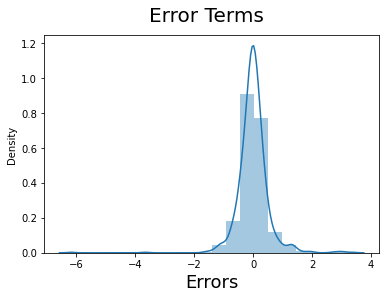

In [808]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_pred_train), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label


We can see that the equation of our best fitted line from Ridge Regression is:

$ SalePrice = 0.537  \times  1stFlrSF + 0.365  \times  2ndFlrSF - 0.504 \times MSSubClass_DUPLEX - ALL STYLES AND AGES - 0.249 \times MSZoning_RH - 0.260 \times MSZoning_RM - 0.610 \times Condition2_PosN - 0.080 \times Condition2_RRAe - 0.759 \times OverallQual_Medium + 0.080 \times RoofStyle_Shed + 0.162 \times RoofMatl_Membran - 0.200 \times RoofMatl_WdShake + 0.587 \times RoofMatl_WdShngl - 0.315 \times ExterCond_Fa - 0.189 \times BsmtQual_Fa	 + 0.170 \times BsmtQual_Gd	 - 0.384 \times BsmtCond_NoBsmt - 0.171 \times Functional_Sev + 0.409 \times Functional_Typ $


### <font color=green>16.4 Observation

-  <font color=blue>The Ridge Regression has given a **train** R2 Score of **72.30%** and **test** R2 Score of **73.71%**.
-  On checking the **histogram of error terms** there is no abnormality.
-  Also the **y_test vs y_test_pred plot** seems normal.    

## <font color=red>17. Comparing accuracy metrics of Linear, Ridge and Lasso Regression  <a name='no17' />

In [809]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )
rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.745337,0.738795,0.722963
1,R2 Score (Test),0.678197,0.701842,0.737125
2,RSS (Train),260.011104,266.689938,282.854279
3,RSS (Test),145.143627,134.478916,118.565465
4,MSE (Train),0.504642,0.511082,0.526343
5,MSE (Test),0.575655,0.554102,0.520286


## <font color=red>18. Comparing Coefficients of Ridge and Lasso Regression  <a name='no18' />

In [810]:
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
pd.set_option('display.max_rows', None)
betas.drop('const')

,Ridge,Lasso
1stFlrSF,0.536769,0.549943
2ndFlrSF,0.364994,0.374991
MSSubClass_DUPLEX - ALL STYLES AND AGES,-0.503816,-0.551971
MSZoning_RH,-0.249373,-0.281634
MSZoning_RM,-0.259623,-0.256147
Condition2_PosN,-0.609562,-3.362149
Condition2_RRAe,-0.079585,-0.000000
OverallQual_Medium,-0.758953,-0.774710
RoofStyle_Shed,0.080236,0.000000
RoofMatl_Membran,0.161841,0.144110


## <font color=red> Analysis of Subjective Answers  <a name='no18' />

### <font color=green> Question 1: Doubling alpha value for Lasso and Rridge Regression

In [811]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_lm, y_train) 
#Fitting Lasso model for alpha = 0.002 and printing coefficients which have been penalised
alpha =0.002 # Doubling alpha value
lasso = Lasso(alpha=alpha)
lasso.fit(X_train_lm, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.8s finished


Lasso(alpha=0.002)

In [812]:
lasso.coef_

array([ 0.        ,  0.5432681 ,  0.36906811, -0.53125571, -0.20379472,
       -0.25245423, -2.28349843, -0.        , -0.77458005,  0.        ,
        0.        , -0.        ,  0.94264789, -0.30667454, -0.15422734,
        0.16211142, -0.3829152 , -0.        ,  0.42054522])

In [813]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train_lm)
y_pred_test = lasso.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 SCORE TRAIN:")
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 SCORE TEST:")
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS TRAIN:")
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS TEST:")
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("MSE TRAIN:")
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("MSE TEST:")
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

R2 SCORE TRAIN:
0.7327613936902816
R2 SCORE TEST:
0.7189060048726088
RSS TRAIN:
272.85061704222244
RSS TEST:
126.78265785399802
MSE TRAIN:
0.26723860630971835
MSE TEST:
0.2894581229543334


In [814]:
ridge = Ridge()
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_lm, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.9s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [815]:
#Fitting Ridge model for alpha = 12 and printing coefficients which have been penalised
alpha = 12 #Doubling alpha for Ridge
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_lm, y_train)
print(ridge.coef_)

[ 0.          0.53690104  0.3630805  -0.45695018 -0.19228231 -0.25252802
 -0.32553507 -0.04261693 -0.73464315  0.03443083  0.0849596  -0.12051457
  0.37170689 -0.2582338  -0.16318359  0.17675268 -0.34321986 -0.09383407
  0.3816182 ]


In [816]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = ridge.predict(X_train_lm)
y_pred_test = ridge.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 SCORE TRAIN:")
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 SCORE TEST:")
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS TRAIN:")
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS TEST:")
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("MSE TRAIN:")
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("MSE TEST:")
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

R2 SCORE TRAIN:
0.7168269435117074
R2 SCORE TEST:
0.736633918418395
RSS TRAIN:
289.1196906745467
RSS TEST:
118.78678445754903
MSE TRAIN:
0.28317305648829255
MSE TEST:
0.27120270424097953


In [817]:
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
pd.set_option('display.max_rows', None)
betas.drop('const').sort_values(by="Ridge",ascending=False)

,Ridge,Lasso
1stFlrSF,0.536901,0.543268
Functional_Typ,0.381618,0.420545
RoofMatl_WdShngl,0.371707,0.942648
2ndFlrSF,0.363080,0.369068
BsmtQual_Gd,0.176753,0.162111
RoofMatl_Membran,0.084960,0.000000
RoofStyle_Shed,0.034431,0.000000
Condition2_RRAe,-0.042617,-0.000000
Functional_Sev,-0.093834,-0.000000
RoofMatl_WdShake,-0.120515,-0.000000


### <font color=green> Question 3: Building Lasso Model without Top5 Predictors

In [818]:
X_train_lm_5=X_train_lm.drop(columns=['Condition2_PosN','RoofMatl_WdShngl','OverallQual_Medium','MSSubClass_DUPLEX - ALL STYLES AND AGES','1stFlrSF'])

In [819]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_lm_5, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.8s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [820]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.001}


In [821]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised
alpha =0.001
lasso = Lasso(alpha=alpha)
lasso.fit(X_train_lm_5, y_train) 

Lasso(alpha=0.001)

In [822]:
lasso.coef_

array([ 0.        ,  0.29992789, -0.59775727, -0.74542661, -0.        ,
       -0.        ,  0.        ,  0.13110037, -0.52787103, -0.35573737,
        0.22052742, -0.68553247, -0.02675917,  0.30238307])

In [823]:
betas = pd.DataFrame(index=X_train_lm_5.columns)
betas.rows = X_train_lm_5.columns
betas['Lasso'] = lasso.coef_
pd.set_option('display.max_rows', None)
betas.drop('const').sort_values(by='Lasso',ascending=False)

,Lasso
Functional_Typ,0.302383
2ndFlrSF,0.299928
BsmtQual_Gd,0.220527
RoofMatl_WdShake,0.131100
Condition2_RRAe,-0.000000
RoofStyle_Shed,-0.000000
RoofMatl_Membran,0.000000
Functional_Sev,-0.026759
BsmtQual_Fa,-0.355737
ExterCond_Fa,-0.527871


## <font color=red> END OF ANALYSIS